# Préparez des données pour un organisme de santé publique

## 0 - Rappel du sujet

L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts, et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers, et d’organisations afin de leur permettre de connaître la qualité nutritionnelle de produits. 

Aujourd’hui, pour ajouter un produit à la base de données d'Open Food Facts, il est nécessaire de remplir de nombreux champs textuels et numériques, ce qui peut conduire à des erreurs de saisie et à des valeurs manquantes dans la base. 

L’agence Santé publique France confie à votre entreprise la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. Dans un premier temps, vous devez vous concentrer sur la prise en main des données, et d’abord les nettoyer et les explorer.

Afin de simplifier ton approche, je te propose de commencer par établir la faisabilité de suggérer les valeurs manquantes pour une variable dont plus de 50% des valeurs sont manquantes.

Voici les différentes étapes pour nettoyer et explorer les données : 

1) Traiter le jeu de données

Repérer des variables pertinentes pour les traitements à venir, et nécessaires pour suggérer des valeurs manquantes,.
Nettoyer les données en :
mettant en évidence les éventuelles valeurs manquantes parmi les variables pertinentes sélectionnées, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
identifiant et en traitant les éventuelles valeurs aberrantes de chaque variable.
Automatiser ces traitements pour éviter de répéter ces opérations
Attention, le client souhaite que le programme fonctionne si la base de données est légèrement modifiée (ajout d’entrées, par xmple) !

 

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

## 1 - Préparer le dataframe

In [5]:
import numpy as np

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import scipy
import scipy.stats as st
import statsmodels
import statsmodels.api as sm
#!pip install missingno
import missingno as msno

print("numpy version", np.__version__)
print("pandas version", pd.__version__)
print("matplotlib version", matplotlib.__version__)
print("seaborn version", sns.__version__)
print("scipy version", scipy.__version__)
print("statsmodels version", statsmodels.__version__)
print("missingno version", msno.__version__)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

numpy version 1.26.4
pandas version 2.1.4
matplotlib version 3.8.0
seaborn version 0.13.2
scipy version 1.11.4
statsmodels version 0.14.0
missingno version 0.5.2


In [6]:
# Charger le fichier de données
data = pd.read_csv("C:/Users/admin/Documents/Projets/Projet_3/openfoodfacts/fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,...,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,NaN,0.0,...,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,NaN,0.0,...,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,NaN,NaN,0.0,...,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [39]:
data.shape

(320772, 162)

In [41]:
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [9]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,...,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,...,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,...,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.076167,10.832591,5.607988,7.971418,13.927752,1.978192,17.512632,6.494183,0.025534,0.029160,0.010597,25.175674,26.010496,NaN,4.972452e-07,NaN,NaN,NaN,1.540223,0.358062,29.731719,22.327284,13.993859,

## 2 - Nettoyer et filtrer des features et produits

- Identifier ma cible selon les critères demandés.
- Mettres en place un processus clair et automatisé pour filtrer les features (variables / colonnes) et des produits (lignes) qui seront utilisés pour atteindre l’objectif de mon projet.

**Lister l’ensemble des features du fichier, quantitatives (numériques) ou qualitatives (catégorielles).**

In [43]:
features = data.columns
for feature in features:
    print(feature)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

**Choisir une cible (une feature ayant moins de 50% de valeurs présentes) catégorielle sera très probablement plus simple à gérer qu’une quantitative dans ce projet.**

In [45]:
list_sort = data.isna().mean().sort_values()
list_sort

last_modified_t                               0.000000
last_modified_datetime                        0.000000
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
code                                          0.000072
url                                           0.000072
states                                        0.000143
states_tags                                   0.000143
states_fr                                     0.000143
countries_fr                                  0.000873
countries                                     0.000873
countries_tags                                0.000873
product_name                                  0.055373
brands                                        0.088574
brands_tags                                   0.088599
energy_100g                                   0.185986
proteins_100g                                 0.189699
salt_100g 

<Axes: >

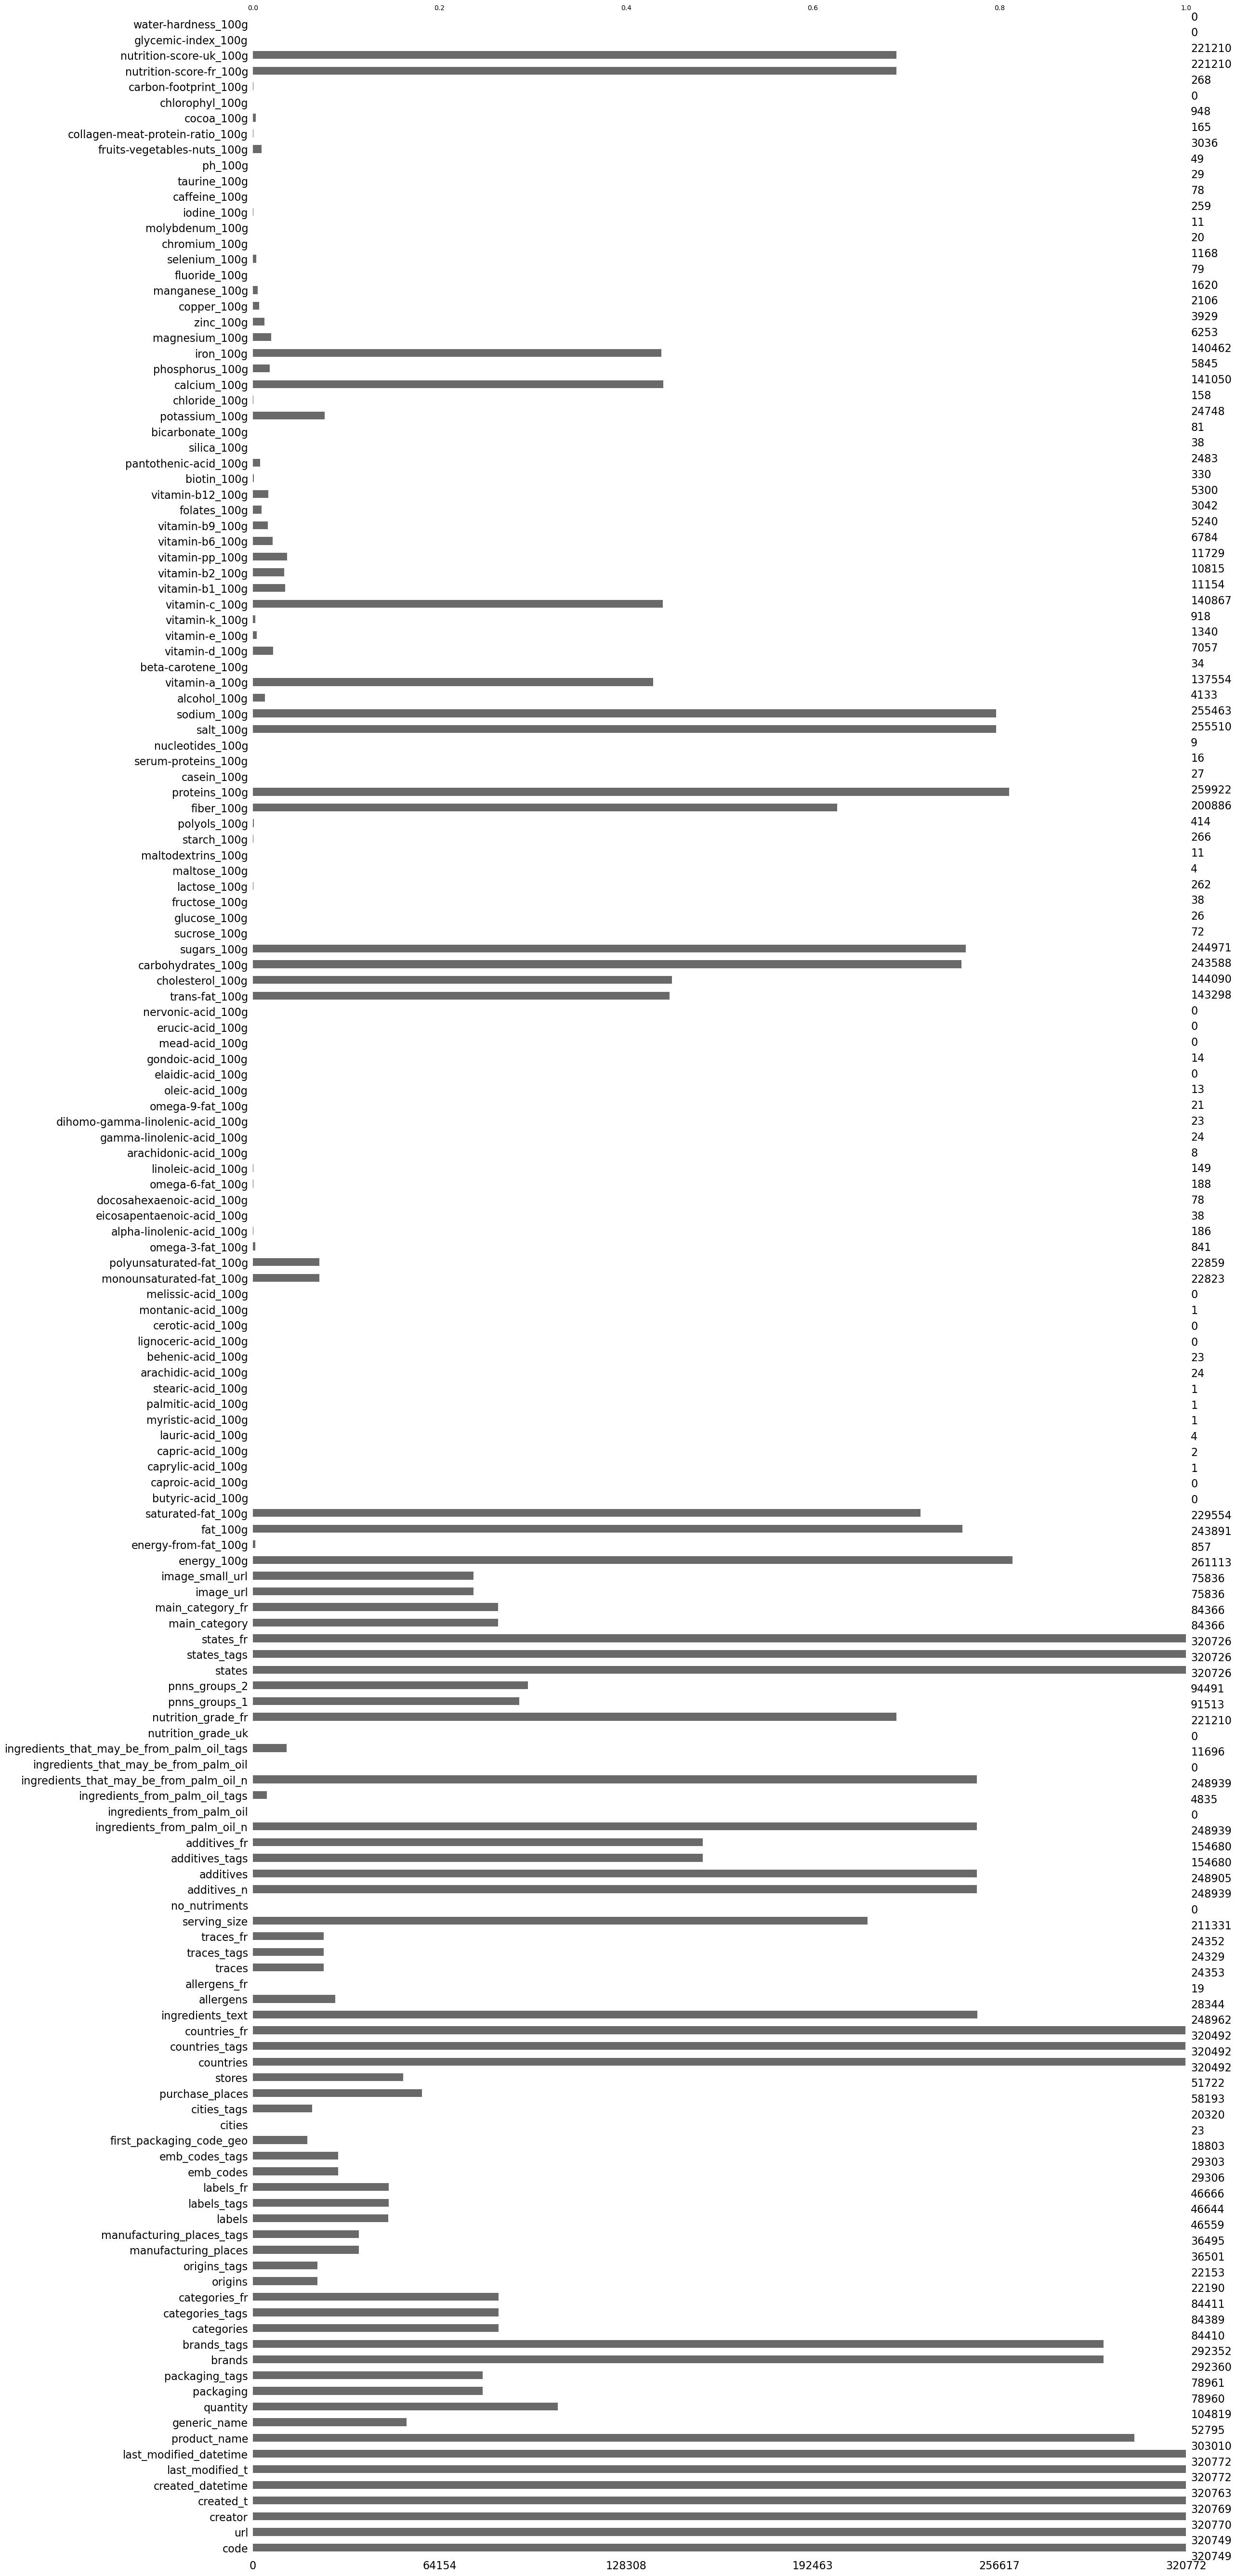

In [15]:
msno.bar(data)

In [47]:
# Filtrer les lignes où 'pnns_groups_1' n'est pas NaN
filtered_data = data[~data['pnns_groups_1'].isna()]

# Extraire la colonne 'nutrition_grade_fr' des lignes filtrées
list_pnns_groups_1 = filtered_data['pnns_groups_1'].unique()

print("Liste des valeurs :", list_pnns_groups_1)
print("Nombre de lignes :", list_pnns_groups_1.size)

Liste des valeurs : ['unknown' 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish Meat Eggs' 'Beverages' 'Fat and sauces'
 'fruits-and-vegetables' 'Milk and dairy products' 'Salty snacks'
 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']
Nombre de lignes : 14


La variable "pnns_groups_1" me paraît être une bonne cible : il y a 14 valeurs possibles. Elle a 71 % de valeurs manquantes 

**Supprimer les lignes (produits) n’ayant pas de valeur cible.**

In [57]:
df = data[~data['pnns_groups_1'].isna()].copy()
df.shape

(91513, 162)

**Supprimer les produits en double.**

Un doublon est un produit dont le code du produit (code) est identique.

In [59]:
# on ajoute une colonne pour indiquer le nombre de valeurs absentes
df['NB_NAN'] = df.isna().sum(axis=1)
# on trie sur le nbre de valeurs absentes
df = df.sort_values('NB_NAN')
# on conserve la ligne doublée qui a le moins de valeurs absentes
df = df.drop_duplicates('code', keep='first')
# on supprime la colonne inutile pour la suite
df = df.drop('NB_NAN', axis=1)

In [61]:
df.shape

(91513, 162)

**Afficher les taux de remplissage des features du dataset.**

In [63]:
list_sort = df.isna().mean().sort_values()
list_sort

code                                          0.000000
pnns_groups_1                                 0.000000
pnns_groups_2                                 0.000000
states                                        0.000000
states_tags                                   0.000000
last_modified_datetime                        0.000000
states_fr                                     0.000000
created_t                                     0.000000
url                                           0.000000
last_modified_t                               0.000000
created_datetime                              0.000011
creator                                       0.000022
countries                                     0.001661
countries_fr                                  0.001661
countries_tags                                0.001661
product_name                                  0.032946
brands                                        0.041721
brands_tags                                   0.041754
quantity  

**Sélectionner des features qui sont assez remplis (plus que 50%) et qui vous paraissent intéressantes pour effectuer la prédiction de votre cible.**

In [65]:
features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g']
df_features = df[features]
df_features.shape

(91513, 7)

Voici les features qui me semblent intéressantes pour la prédiction de la cible :
- energy_100g
- proteins_100g
- fat_100g
- carbohydrates_100g
- salt_100g
- sugars_100g
- saturated-fat_100g

**Séparer la cible du reste du dataset.**

In [68]:
df_cible = df['pnns_groups_1']
df = df.drop('pnns_groups_1', axis=1)

In [70]:
df.shape

(91513, 161)

In [72]:
df_cible.shape

(91513,)

<Axes: >

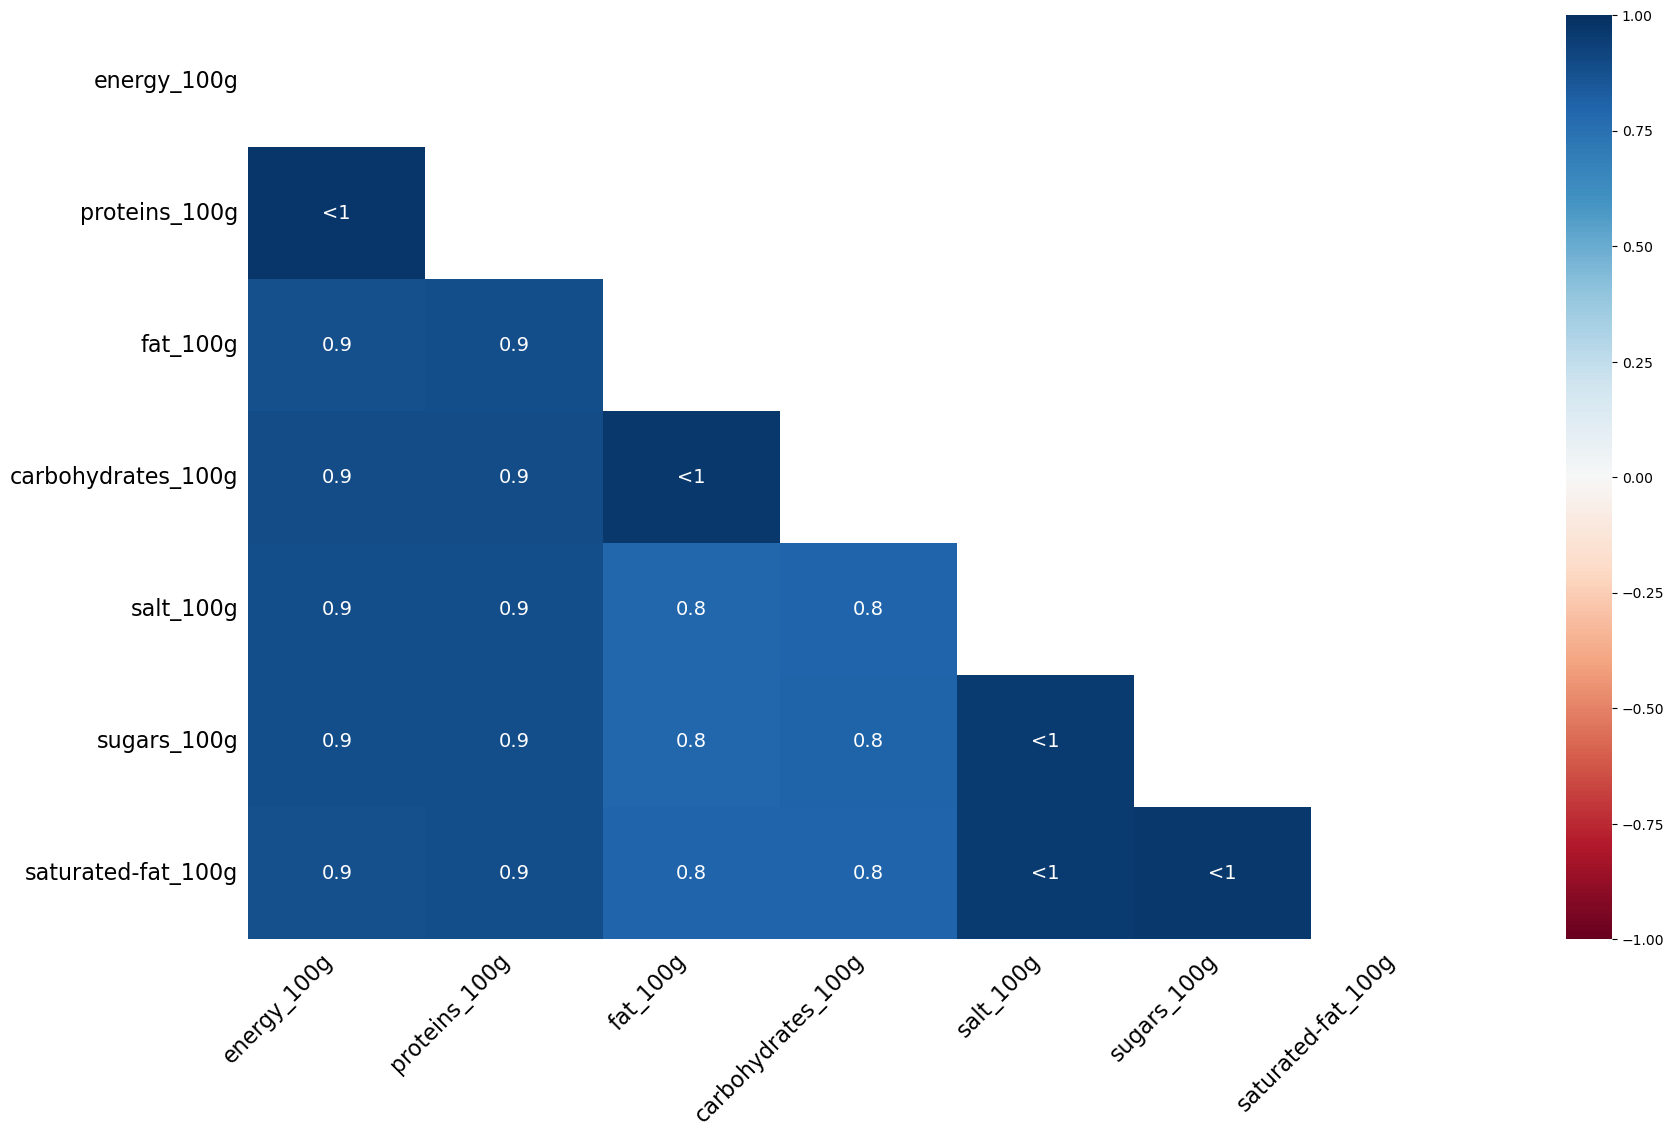

In [74]:
msno.heatmap(df_features)

**Automatiser tout ce qui a été fait jusqu’à maintenant en utilisant :**
- une fonction qui prend en input votre dataframe d’origine
- les méthodes spécifiques aux dataframes pandas. Accessoirement numpy si ce que vous voulez faire n’est pas directement ou simplement disponible via la librairie pandas.

In [34]:
def 

SyntaxError: invalid syntax (1885169875.py, line 1)

## 2 - Identifier et traiter les valeurs aberrantes

### 2.1 - vue globale

In [82]:
df_features.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sugars_100g,saturated-fat_100g
count,6.781100e+04,67145.000000,64385.000000,63936.000000,63871.000000,63608.000000,63303.000000
mean,1.151248e+03,7.487988,13.472701,27.913021,1.147655,13.245045,5.346083
std,1.252937e+04,7.616220,17.355936,27.440664,4.831658,18.869655,8.299061
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
25%,3.920000e+02,1.600000,1.100000,4.400000,0.070000,1.000000,0.300000
50%,1.010000e+03,5.800000,6.500000,14.500000,0.508000,4.200000,1.900000
75%,1.645000e+03,10.200000,21.300000,53.300000,1.200000,17.000000,7.400000
max,3.251373e+06,100.000000,380.000000,190.000000,297.600000,134.000000,210.000000


Sans entrer dans le détail, on constate déjà des valeurs aberrantes:
- Les valeurs max ne devraient pas dépasser 100 grammes (sauf "energy_100g"). Or toutes les features ont une valeur max > 100g (exemple fat max = 380g)
- Les valeurs min ne peuvent pas être négatives. Or pour la feature "sugars_100g", il y a au moins une valeur négative.
- L'energy_100g est exprimé en Kj. Or il y a une valeur max de 3 000 000 Kj, ce qui paraît aberrant


Pour déterminer si une valeur de 3.251373e+06 kJ (soit 3 251 373 kJ) est aberrante pour un produit, il est important de considérer le contexte, c'est-à-dire le type de produit et l'unité de mesure :

1. Interprétation de la valeur :
3 251 373 kJ correspond à 3 251 373 000 joules.
En termes plus courants, cela équivaut à environ 776 598 kcal (1 kJ = 0,239 kcal).
2. Contexte énergétique des produits :
Pour la plupart des produits alimentaires, les valeurs énergétiques typiques varient généralement de quelques dizaines à plusieurs milliers de kilojoules par portion (par exemple, 100 g).
Exemple :
Une pomme contient environ 218 kJ (52 kcal).
Un hamburger peut contenir environ 2 500 kJ (600 kcal).
Si on parle de produits non alimentaires (combustibles, énergie industrielle, etc.), les valeurs énergétiques peuvent être beaucoup plus élevées.
3. Cas possible d'erreur :
Erreur d'unité : Si l'on s'attendait à une valeur en kcal et non en kJ, ou si la valeur correspond à une plus petite portion.
Erreur d'échelle : La valeur pourrait correspondre à une grande quantité du produit (par exemple, 1 tonne au lieu de 1 kg).
Erreur de saisie : Un problème de saisie ou de calcul

### 2.2 - Feature "energy_100g"
Visualiser la distribution de la variable

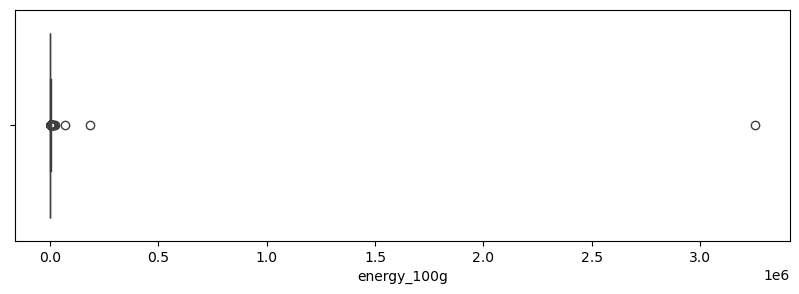

In [80]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['energy_100g'], orient='h')
plt.show()

## 3 - Identifier et traiter les valeurs manquantes

## 4 - Effectuer les analyses uni-variées et bi-variées

## 5 - Réaliser une analyse multi-variée

## 6 - RGPD